# ABSTRACT

> The "House Price Prediction" project aims to develop a machine learning model to predict housing prices based on various features such as lot size, building type, and neighborhood. Utilizing a dataset from a reputable source, the project involves data cleaning, exploratory data analysis (EDA), and the application of regression models. The model's performance is evaluated to ensure accurate and reliable predictions. The outcome of this project can assist stakeholders in making informed decisions in the real estate market.

# OBJECTIVE

> The primary objective of this project is to develop a machine learning model that can predict house prices based on various features of the properties. Specific objectives include:

>> 1). Cleaning and preprocessing the dataset to ensure high-quality data.

>> 2). Conducting exploratory data analysis (EDA) to understand the relationships between features and house prices.

>> 3). Implementing and evaluating multiple regression models to determine the most accurate predictor.

>> 4). Providing insights and recommendations based on the model's predictions to assist in real estate decision-making.


# INTRODUCTION

> The real estate market is a significant component of the global economy, where accurate price predictions can lead to better investment decisions and market understanding. This project focuses on predicting house prices using a dataset containing various features related to property characteristics. By leveraging machine learning techniques, the project aims to build a robust predictive model that can provide accurate price estimates, thereby benefiting buyers, sellers, and investors in making informed decisions.

# METHODOLOGY

#### 1). Importing Dataset and Data Inception:

> With the help of Pandas library of python we had extracted the data from the CSV file named 'housing_price_prediction.csv' which was prepared by Kaggle Community. 

> Here data is also checked that how many null values are present in each columns. So that furthur while analysis and also while making models, we can't find difficulty. 

#### 2). Data Cleaning: 

> The main purpose of Data Cleaning is to fill the null values. We can also say that to handle the null value because if the data remain unclean then EDA can't be accurate.

> Converting categorical variables into numerical formats using techniques like one-hot encoding.

> If the dtypes of columns holding data, is non numeric, then fill it with 'None' rather then to keep it null because in Analysis, "None" is not count as null.

> So for this we had filled the numeric values [ Float64, int64, etc. dtypes ], with either mean or mode as per need.


#### 3). EDA: 

> We had done two types of EDA .. for better understanding of our data set. 
> 
###### a): Univariate Analysis:
> Analyzing the distribution and statistics of individual features.
> 
###### b): Bivariate and Multivariate Analysis: 
> Exploring relationships between features and the target variable (house prices), using visualizations like scatter plots, histograms, and correlation matrices.


#### 4). Data Preparaton:

> For Data Preparation, we had divide the whole in 'numeric' and 'non-numeric' values. Where leter with the help of '.dummies' module of pandas, we had converted non_numeric terms to numeric too, and later we concat them so that we not get the clear from of Data. 

> For model, we divided the whole into 4 parts. Suppose X is input and Y is output then, we split X as per train and test and smiliar with Y too. So in total we split whole data set with 4 parts. which can be X_train, X_test, y_train, y_test.

> Scaling and normalizing the data to ensure that all features contribute equally to the model.

> For spliting and scaling and normalizing we used Sklearn library 


#### 5). ML Model:

> While preparing ML model we had split with two processes:

##### a). Model Implementation: 
> Here with the help of Sklearn, we make sure to apply 'Linear Regression', 'Ridge', 'Lasso'. Each will do analysis first and then each will give output as per the working of the algorithms.

##### b). Model Evalution: 
> Evaluating the models using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared score.
This will help to conclude that which model is best to use and which is not healthy for data.

# CODE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


## Importing Dataset & Data Inception


In [4]:
housing = pd.read_csv('housing_price_prediction.csv')

In [5]:
housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing.isnull().sum()/housing.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

## Data Cleaning

In [8]:
 na_col = [col for col in housing.columns if housing[col].isnull().any() and housing[col].dtype == 'object']

In [9]:
na_col

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
for feature in na_col:
    housing[feature].fillna('None',inplace=True)

In [11]:
housing.isnull().sum()/housing.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
B

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='SalePrice', ylabel='Density'>

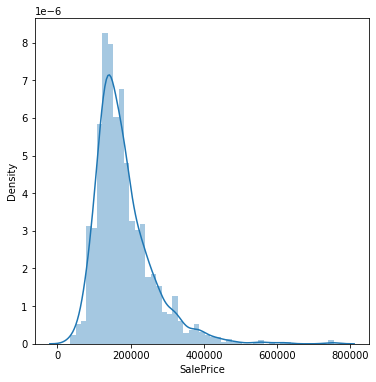

In [13]:
plt.figure(figsize=(6,6))
sns.distplot(housing['SalePrice'])

In [14]:
housing['SalePrice'].skew()

1.8828757597682129

In [15]:
housing['SalePrice'].kurt()

6.536281860064529

<Axes: xlabel='SalePrice', ylabel='Density'>

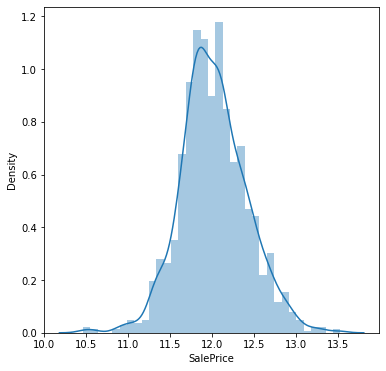

In [16]:
housing['SalePrice'] = np.log(housing['SalePrice'])
plt.figure(figsize=(6,6))
sns.distplot(housing['SalePrice'])

In [17]:
housing['SalePrice'].skew()

0.12133506220520406

In [18]:
housing['SalePrice'].kurt()

0.8095319958036296

In [19]:
housing.drop('Id',axis=1,inplace=True)

In [20]:
housing[['MSSubClass','OverallQual','OverallCond']] = housing[['MSSubClass','OverallQual','OverallCond']].astype('object')

In [21]:
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors='coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors='coerce')

In [22]:
null_cols = housing.columns[housing.isnull().any()]
null_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [23]:
for feature in null_cols:
    if housing[feature].dtype == np.float64 or housing[feature].dtype == np.int64:
        housing[feature].fillna(housing[feature].mean(), inplace=True)
    else:
        housing[feature].fillna(housing[feature].mode()[0], inplace=True)

In [24]:
housing.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## EDA


In [25]:
cat_cols = housing.select_dtypes(include='object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [26]:
num_cols = housing.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Univarite Analysis

LotFrontage


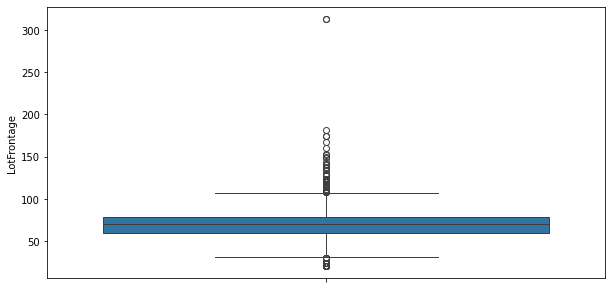

LotArea


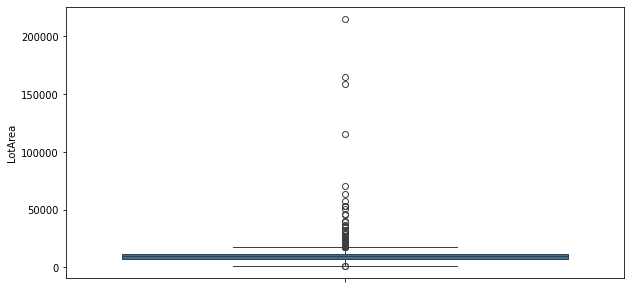

YearBuilt


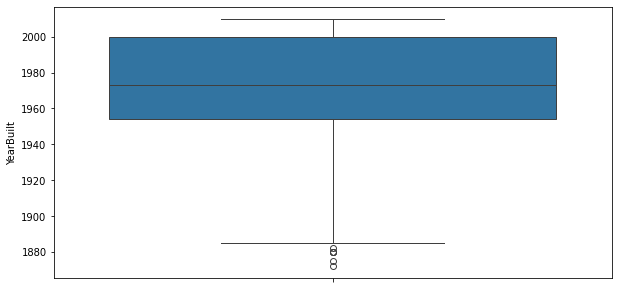

YearRemodAdd


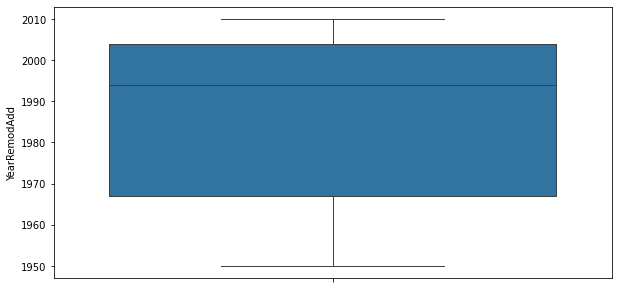

MasVnrArea


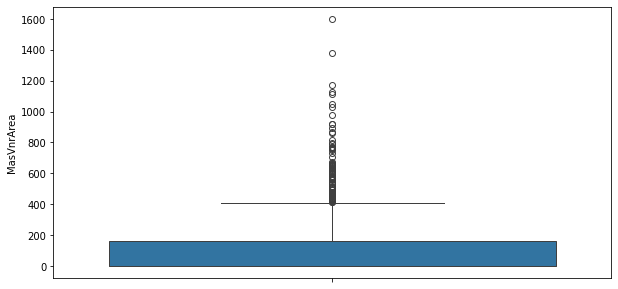

BsmtFinSF1


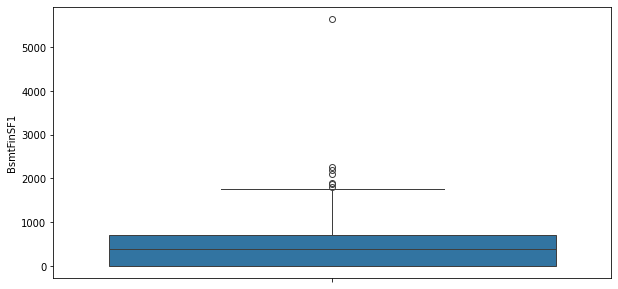

BsmtFinSF2


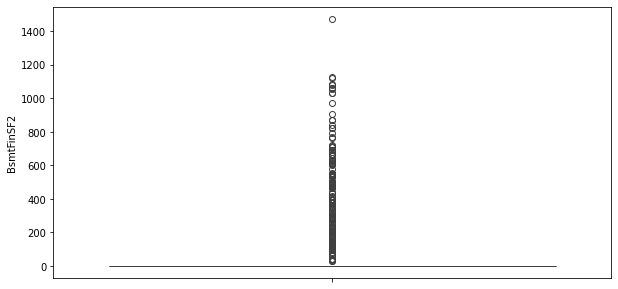

BsmtUnfSF


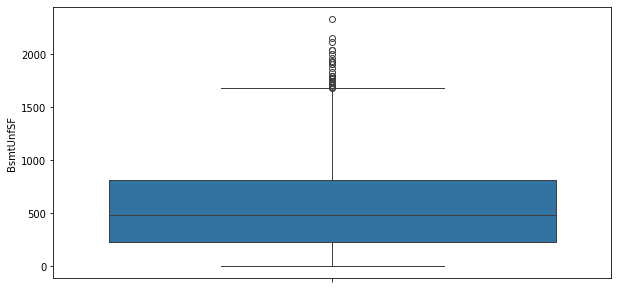

TotalBsmtSF


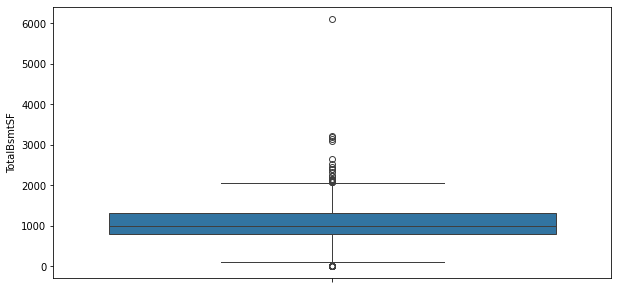

1stFlrSF


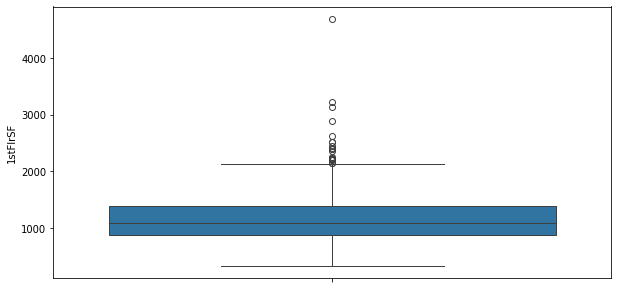

2ndFlrSF


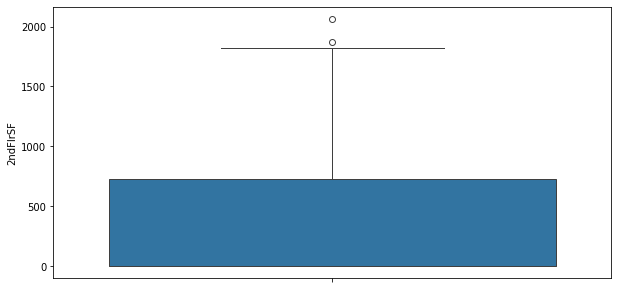

LowQualFinSF


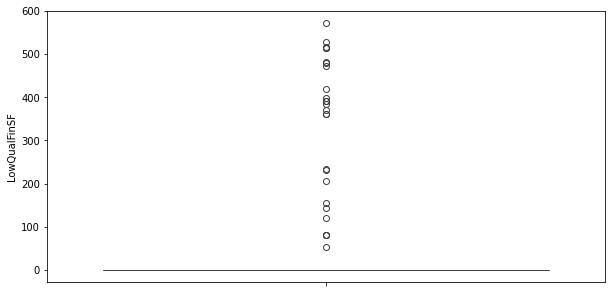

GrLivArea


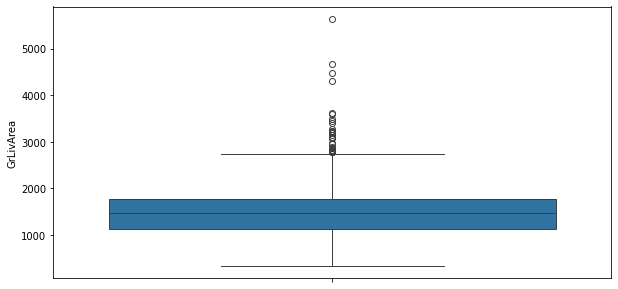

BsmtFullBath


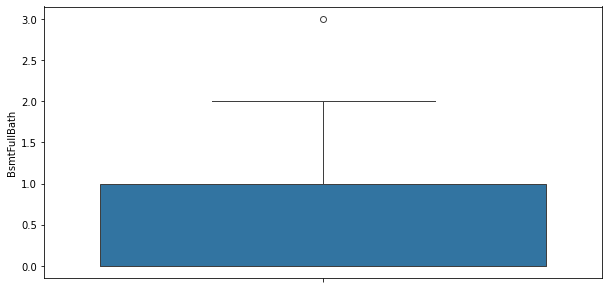

BsmtHalfBath


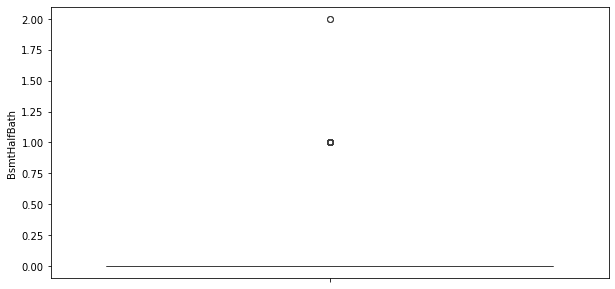

FullBath


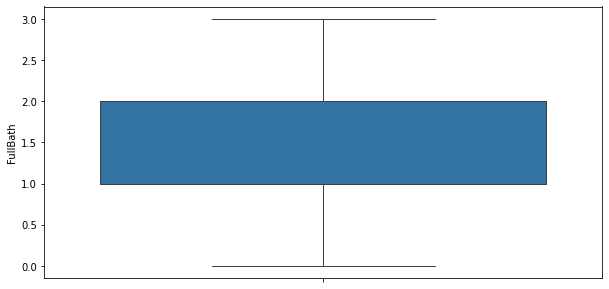

HalfBath


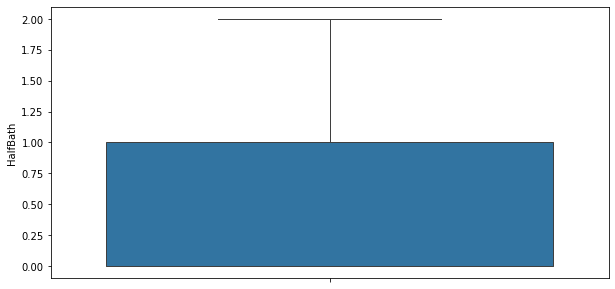

BedroomAbvGr


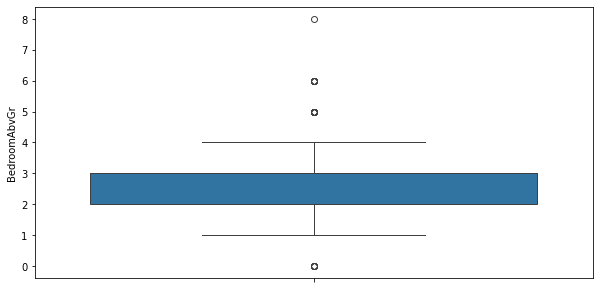

KitchenAbvGr


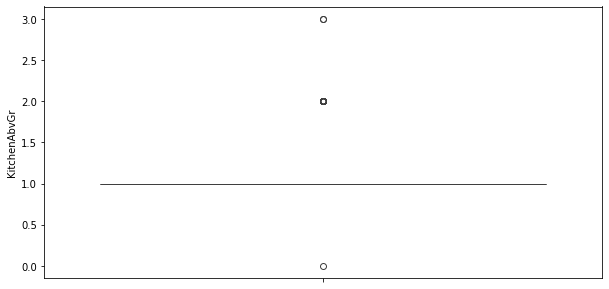

TotRmsAbvGrd


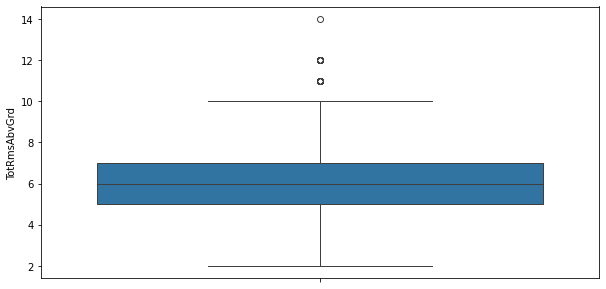

Fireplaces


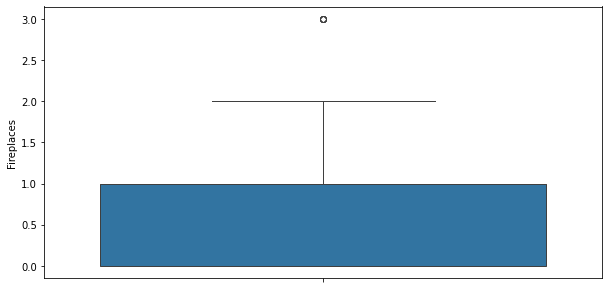

GarageYrBlt


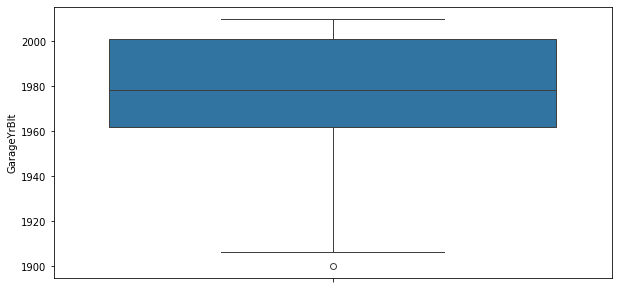

GarageCars


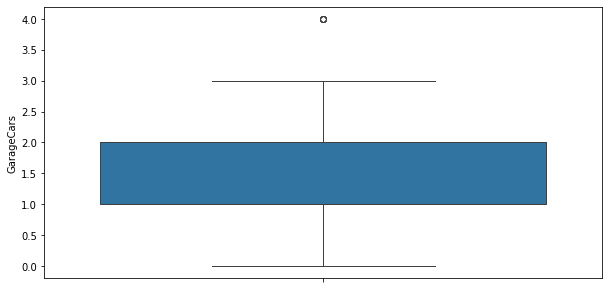

GarageArea


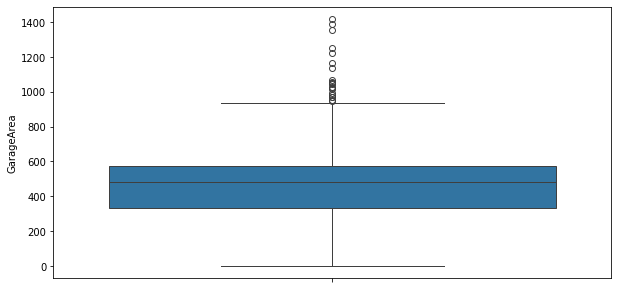

WoodDeckSF


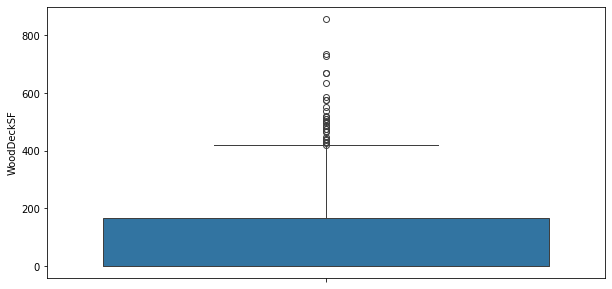

OpenPorchSF


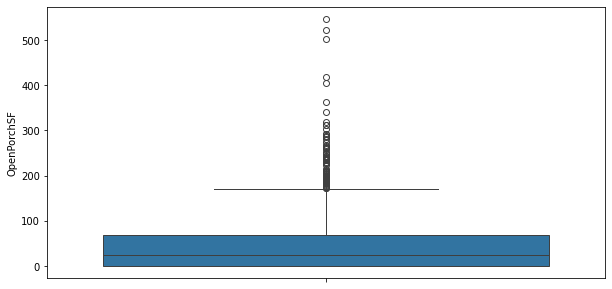

EnclosedPorch


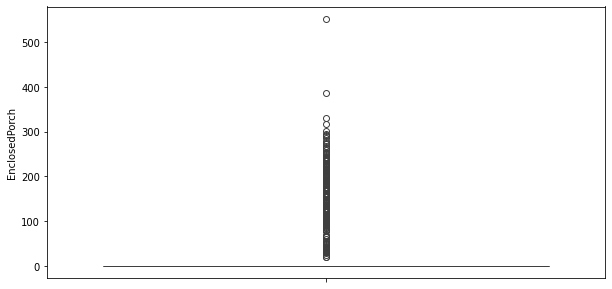

3SsnPorch


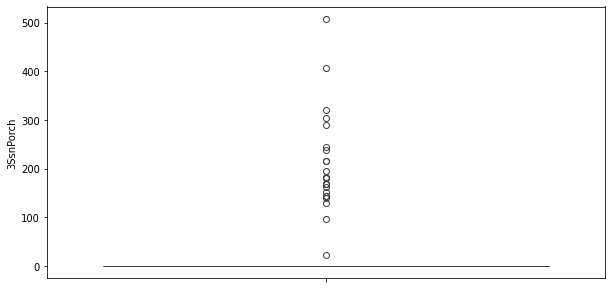

ScreenPorch


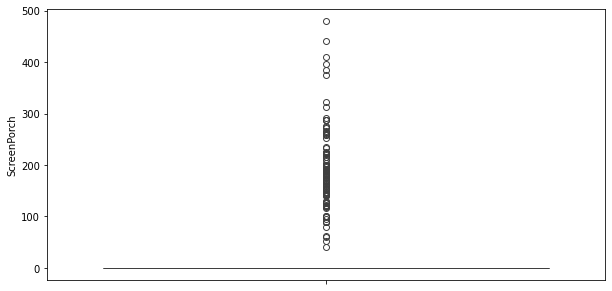

PoolArea


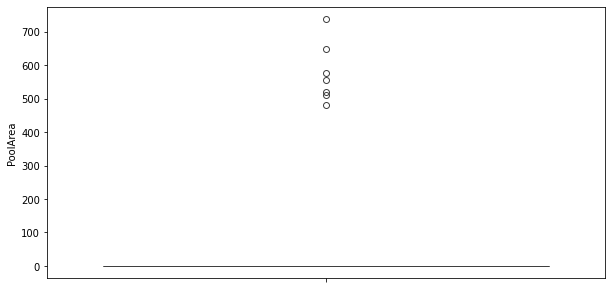

MiscVal


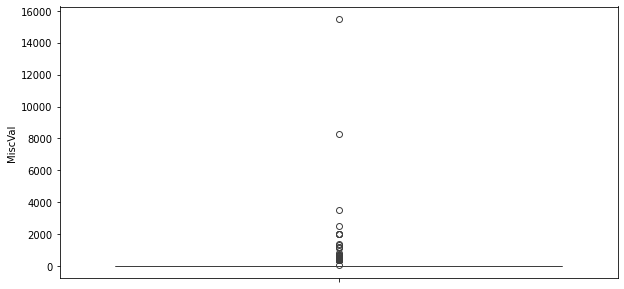

MoSold


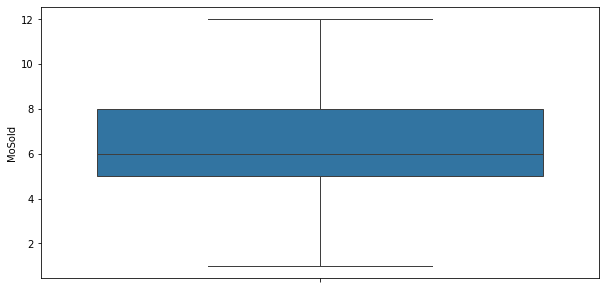

YrSold


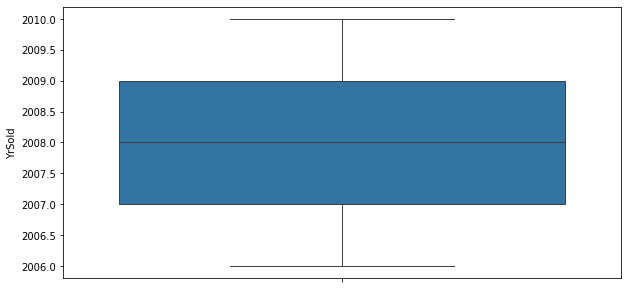

SalePrice


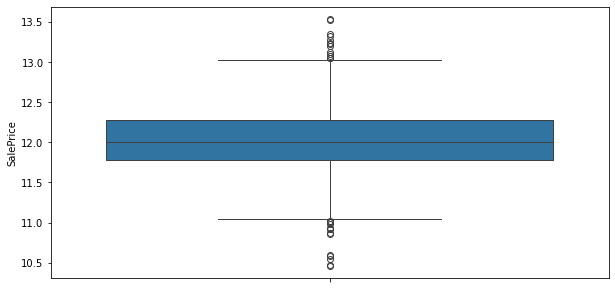

In [27]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    print(col)
    sns.boxplot(housing[col])
    plt.show()

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64


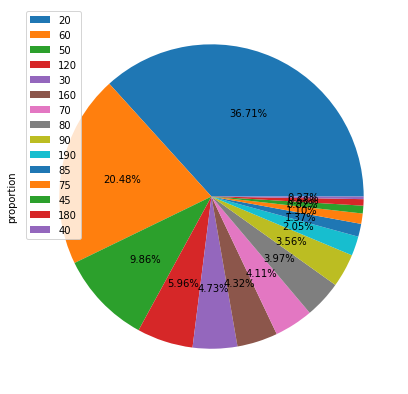

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64


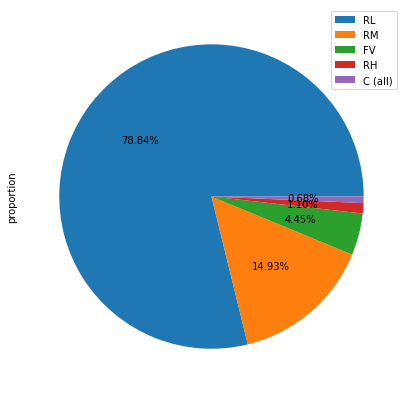

Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64


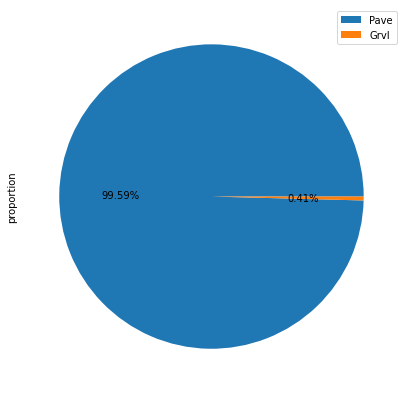

Alley
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: proportion, dtype: float64


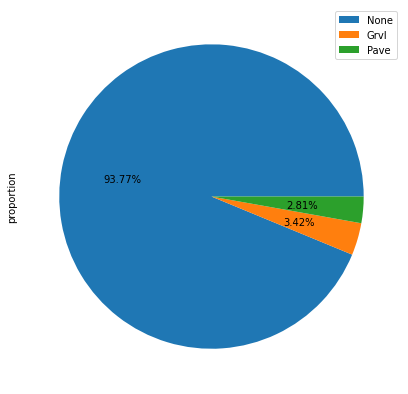

LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64


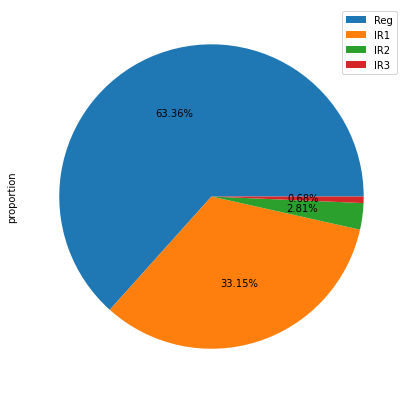

LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64


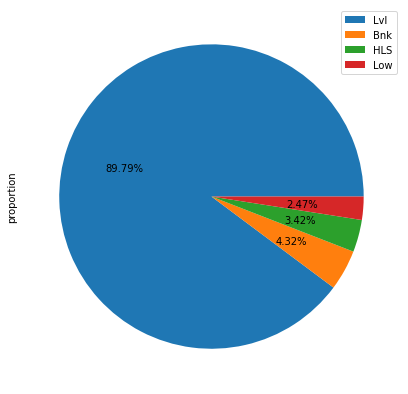

Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64


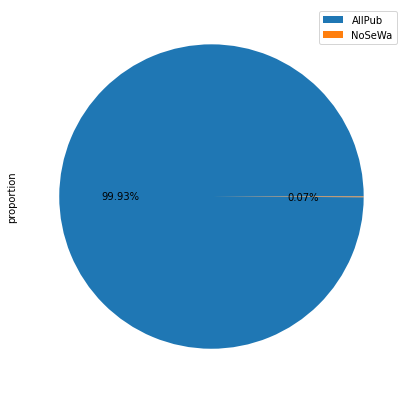

LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64


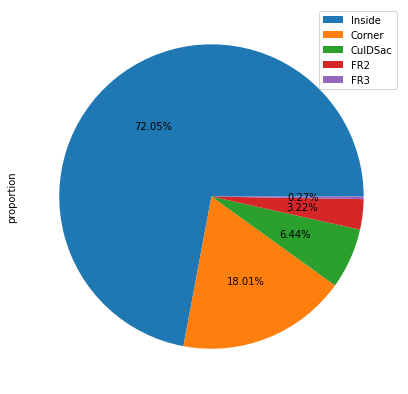

LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64


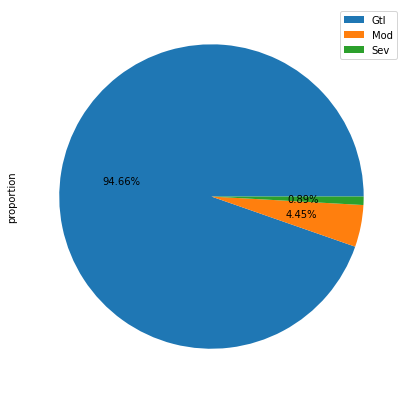

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64


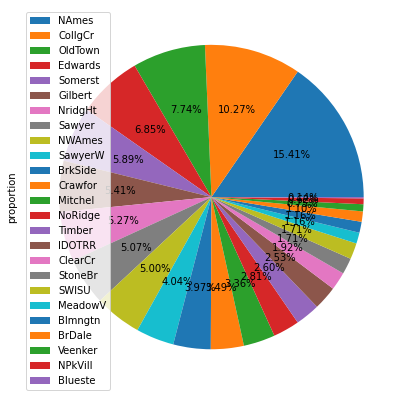

Condition1
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: proportion, dtype: float64


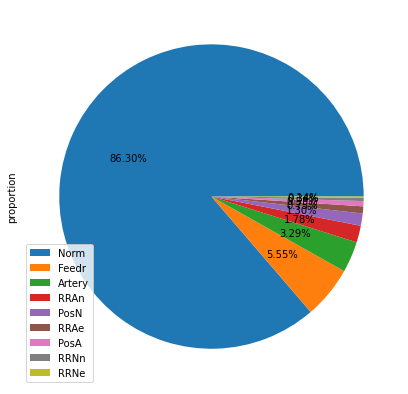

Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: proportion, dtype: float64


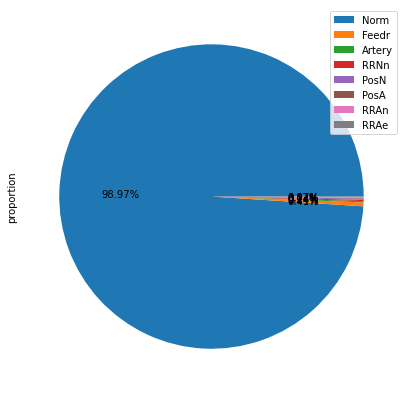

BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: proportion, dtype: float64


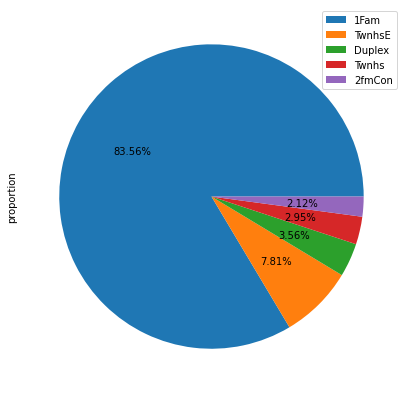

HouseStyle
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: proportion, dtype: float64


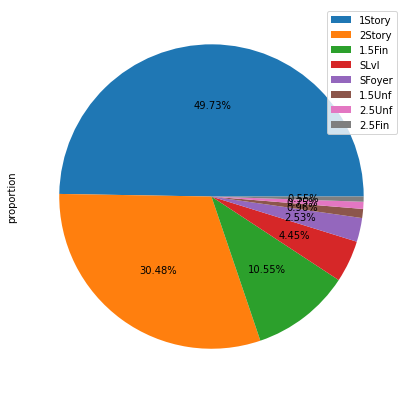

OverallQual
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: proportion, dtype: float64


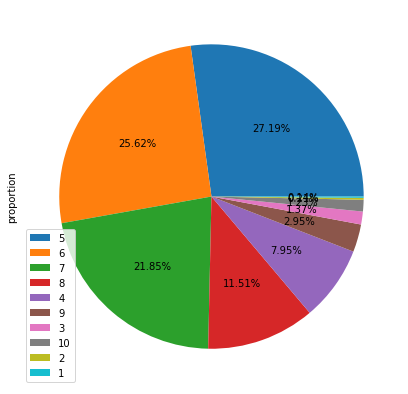

OverallCond
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: proportion, dtype: float64


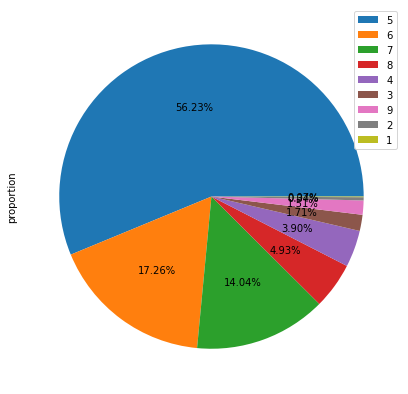

RoofStyle
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: proportion, dtype: float64


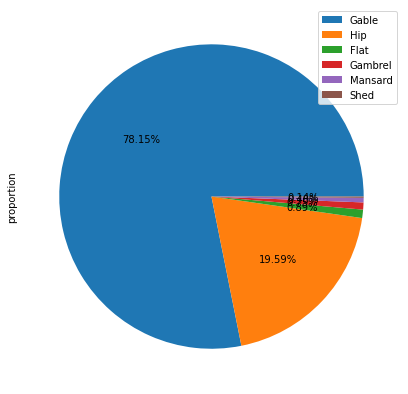

RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: proportion, dtype: float64


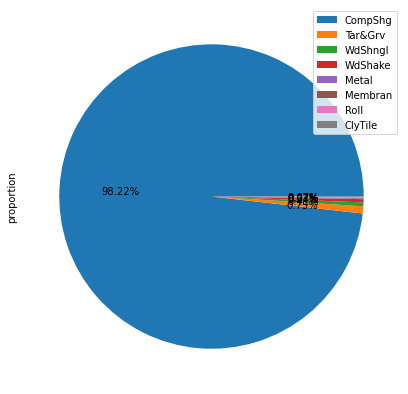

Exterior1st
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: proportion, dtype: float64


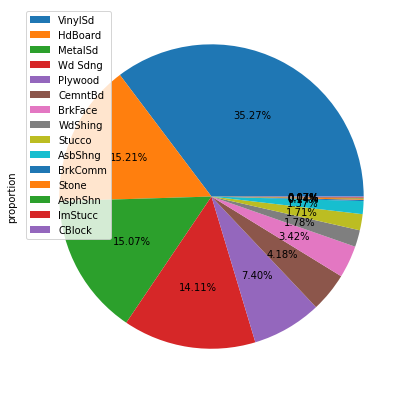

Exterior2nd
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: proportion, dtype: float64


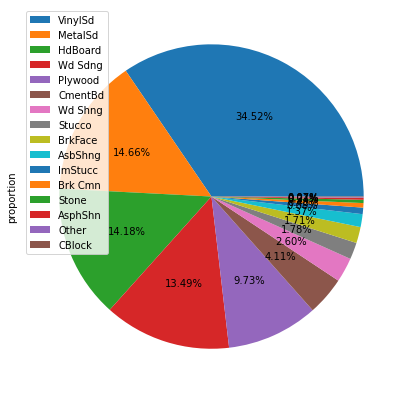

MasVnrType
None       0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: proportion, dtype: float64


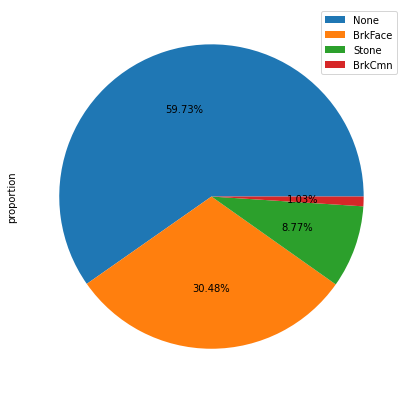

ExterQual
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: proportion, dtype: float64


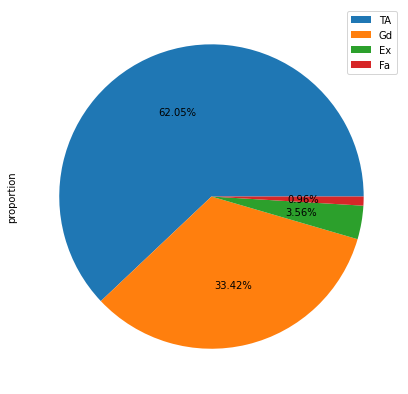

ExterCond
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: proportion, dtype: float64


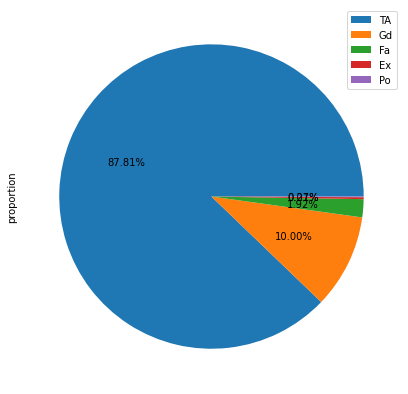

Foundation
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: proportion, dtype: float64


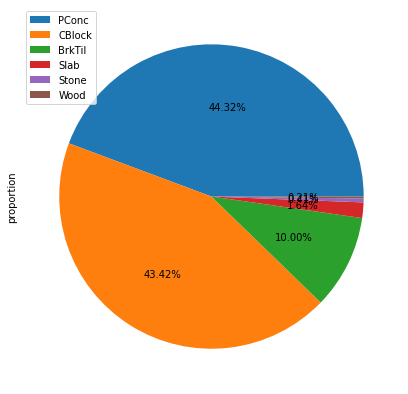

BsmtQual
TA      0.444521
Gd      0.423288
Ex      0.082877
None    0.025342
Fa      0.023973
Name: proportion, dtype: float64


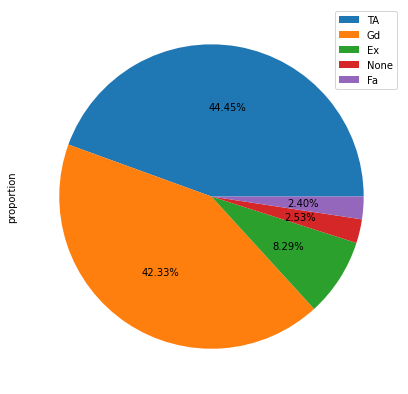

BsmtCond
TA      0.897945
Gd      0.044521
Fa      0.030822
None    0.025342
Po      0.001370
Name: proportion, dtype: float64


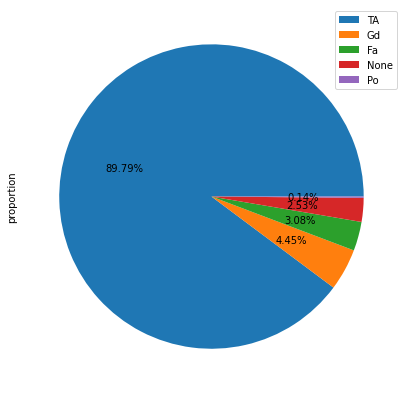

BsmtExposure
No      0.652740
Av      0.151370
Gd      0.091781
Mn      0.078082
None    0.026027
Name: proportion, dtype: float64


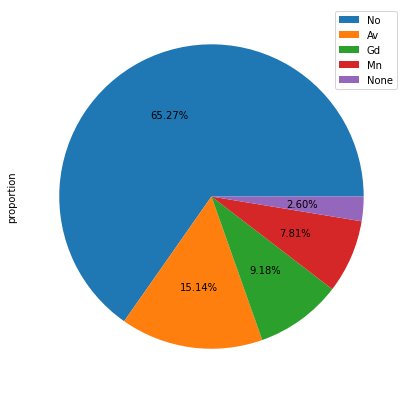

BsmtFinType1
Unf     0.294521
GLQ     0.286301
ALQ     0.150685
BLQ     0.101370
Rec     0.091096
LwQ     0.050685
None    0.025342
Name: proportion, dtype: float64


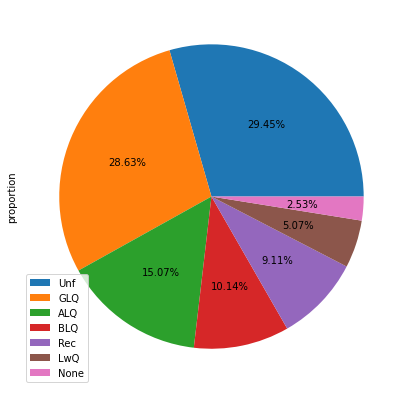

BsmtFinType2
Unf     0.860274
Rec     0.036986
LwQ     0.031507
None    0.026027
BLQ     0.022603
ALQ     0.013014
GLQ     0.009589
Name: proportion, dtype: float64


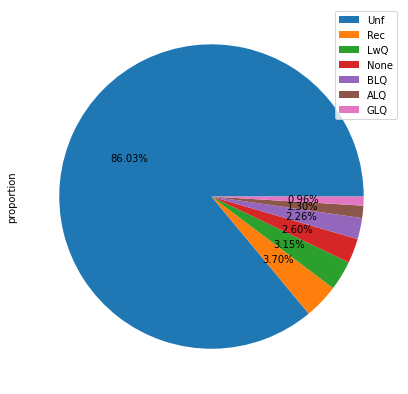

Heating
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: proportion, dtype: float64


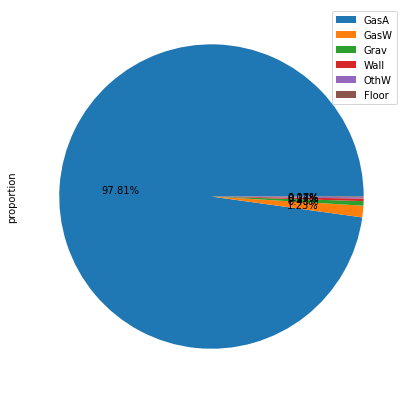

HeatingQC
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: proportion, dtype: float64


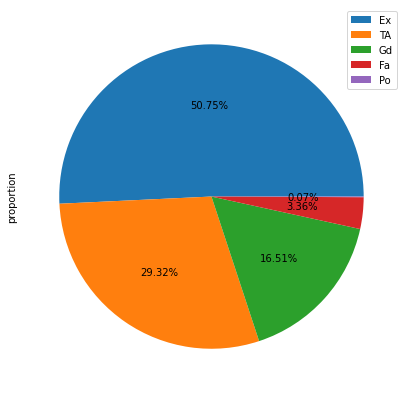

CentralAir
Y    0.934932
N    0.065068
Name: proportion, dtype: float64


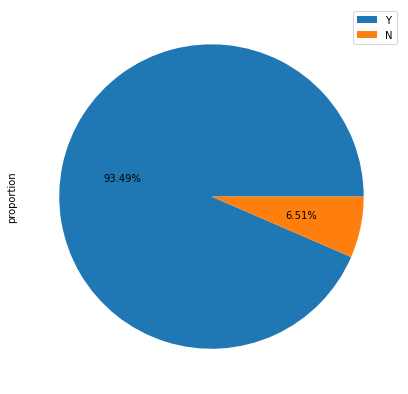

Electrical
SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
None     0.000685
Name: proportion, dtype: float64


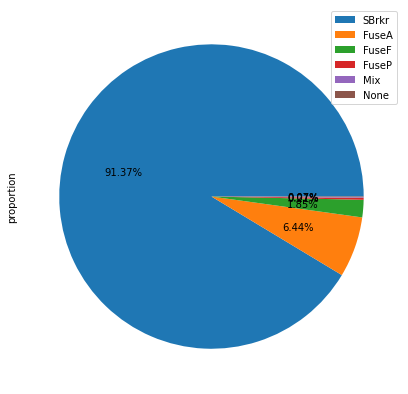

KitchenQual
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: proportion, dtype: float64


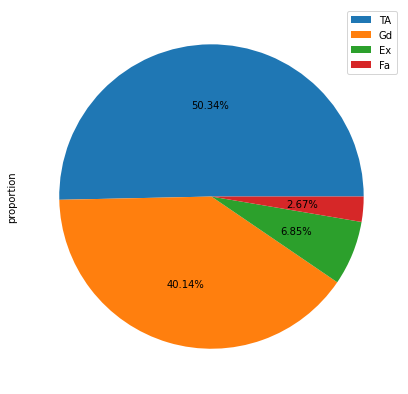

Functional
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: proportion, dtype: float64


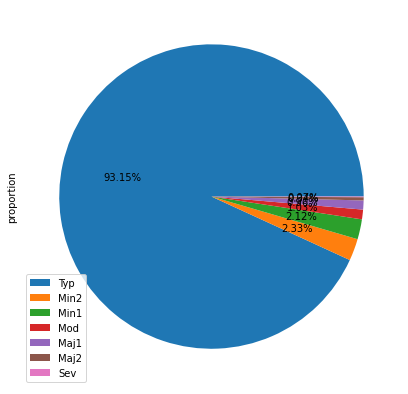

FireplaceQu
None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: proportion, dtype: float64


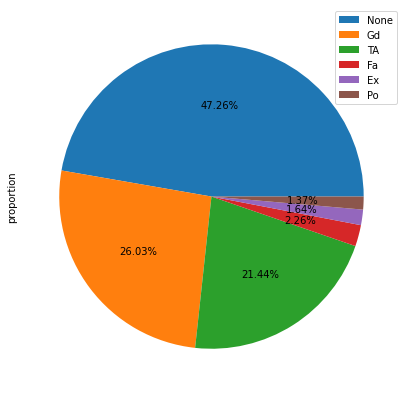

GarageType
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
None       0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: proportion, dtype: float64


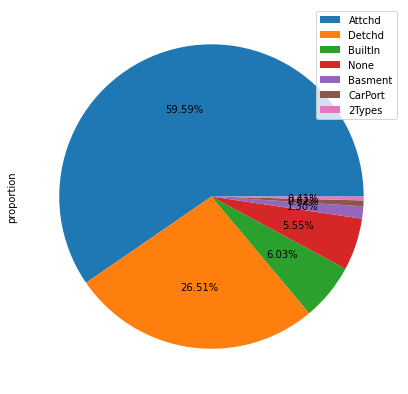

GarageFinish
Unf     0.414384
RFn     0.289041
Fin     0.241096
None    0.055479
Name: proportion, dtype: float64


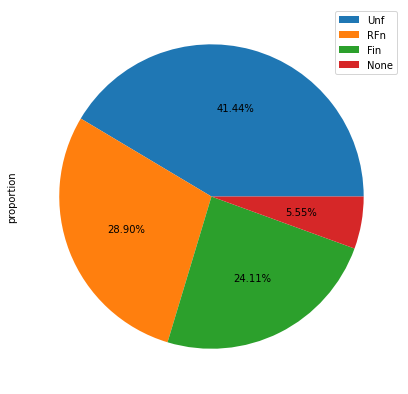

GarageQual
TA      0.897945
None    0.055479
Fa      0.032877
Gd      0.009589
Ex      0.002055
Po      0.002055
Name: proportion, dtype: float64


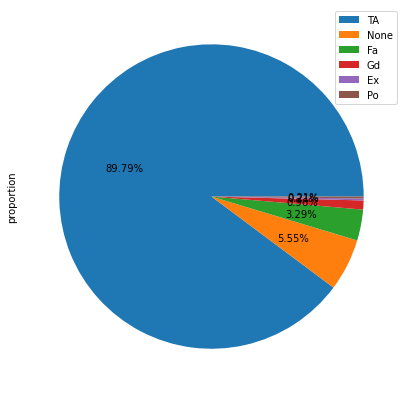

GarageCond
TA      0.908219
None    0.055479
Fa      0.023973
Gd      0.006164
Po      0.004795
Ex      0.001370
Name: proportion, dtype: float64


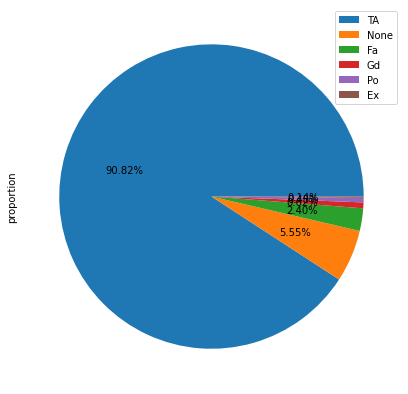

PavedDrive
Y    0.917808
N    0.061644
P    0.020548
Name: proportion, dtype: float64


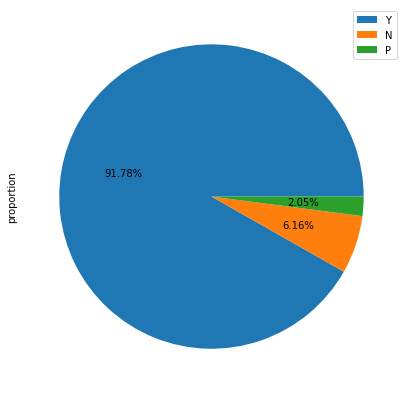

PoolQC
None    0.995205
Gd      0.002055
Ex      0.001370
Fa      0.001370
Name: proportion, dtype: float64


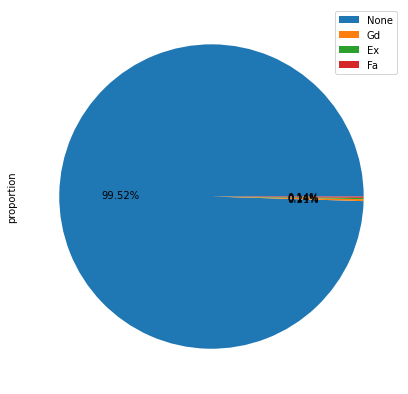

Fence
None     0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: proportion, dtype: float64


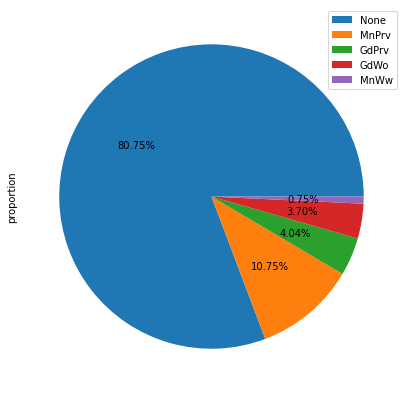

MiscFeature
None    0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: proportion, dtype: float64


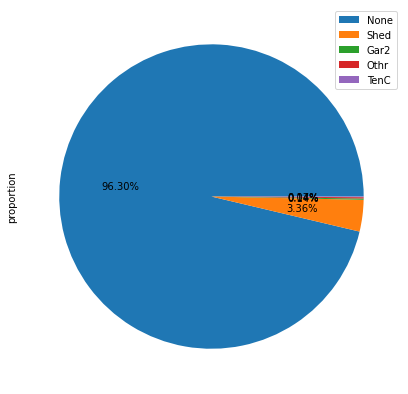

SaleType
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: proportion, dtype: float64


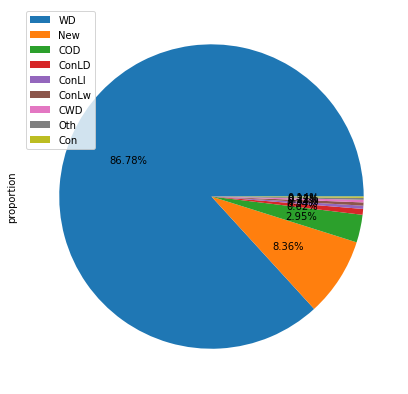

SaleCondition
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: proportion, dtype: float64


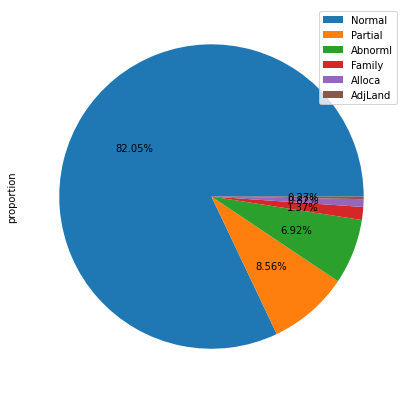

In [28]:
for col in cat_cols:
    print(housing[col].value_counts(normalize=True))
    plt.figure(figsize=(7,7))
    housing[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct='%1.2f%%')
    plt.legend()
    plt.show()

### Bivariate / Multivaritate Analysis

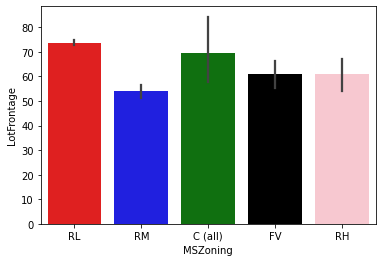

In [29]:
sns.barplot(x='MSZoning', y='LotFrontage',data=housing, palette=['red','blue','green','black','pink'])
plt.show()

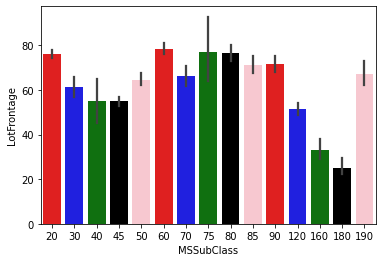

In [30]:
sns.barplot(x='MSSubClass', y='LotFrontage',data=housing, palette=['red','blue','green','black','pink'])
plt.show()

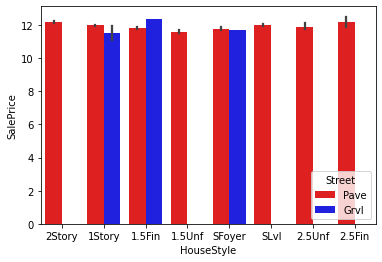

In [31]:
sns.barplot(x='HouseStyle', y='SalePrice',hue='Street',data=housing, palette=['red','blue','green','black','pink'])
plt.show()

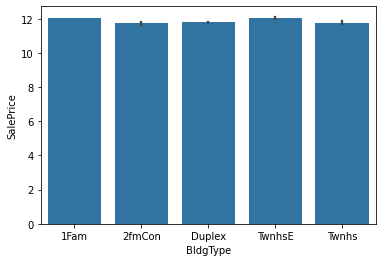

In [32]:
sns.barplot(x="BldgType",y="SalePrice",data=housing)
plt.show()

##### Conclusion 

> We can see that RL( Residential Low Density ) has highest lot frontage and RM (Residential Medium Density) has least

> We can see that 2-story 1946 & Newer has highest lot frontGE and PUD-MULTILEVEL-INCL SPLIT LEV/FOYER has least

> The SalesPrice is not showing much varience with respect to the Style of dwelling (1 story / 2 story)

> The SalesPrice is almost same for all the Building Type (Type of Dwelling) and the basement quality so there is no significant pattern

In [33]:
housing['Age'] = housing['YrSold'] - housing['YearBuilt']

In [34]:
housing['Age'].head()

0     5
1    31
2     7
3    91
4     8
Name: Age, dtype: int64

In [35]:
housing.drop(columns=['YearBuilt','YrSold'],axis=1, inplace=True)

<Axes: >

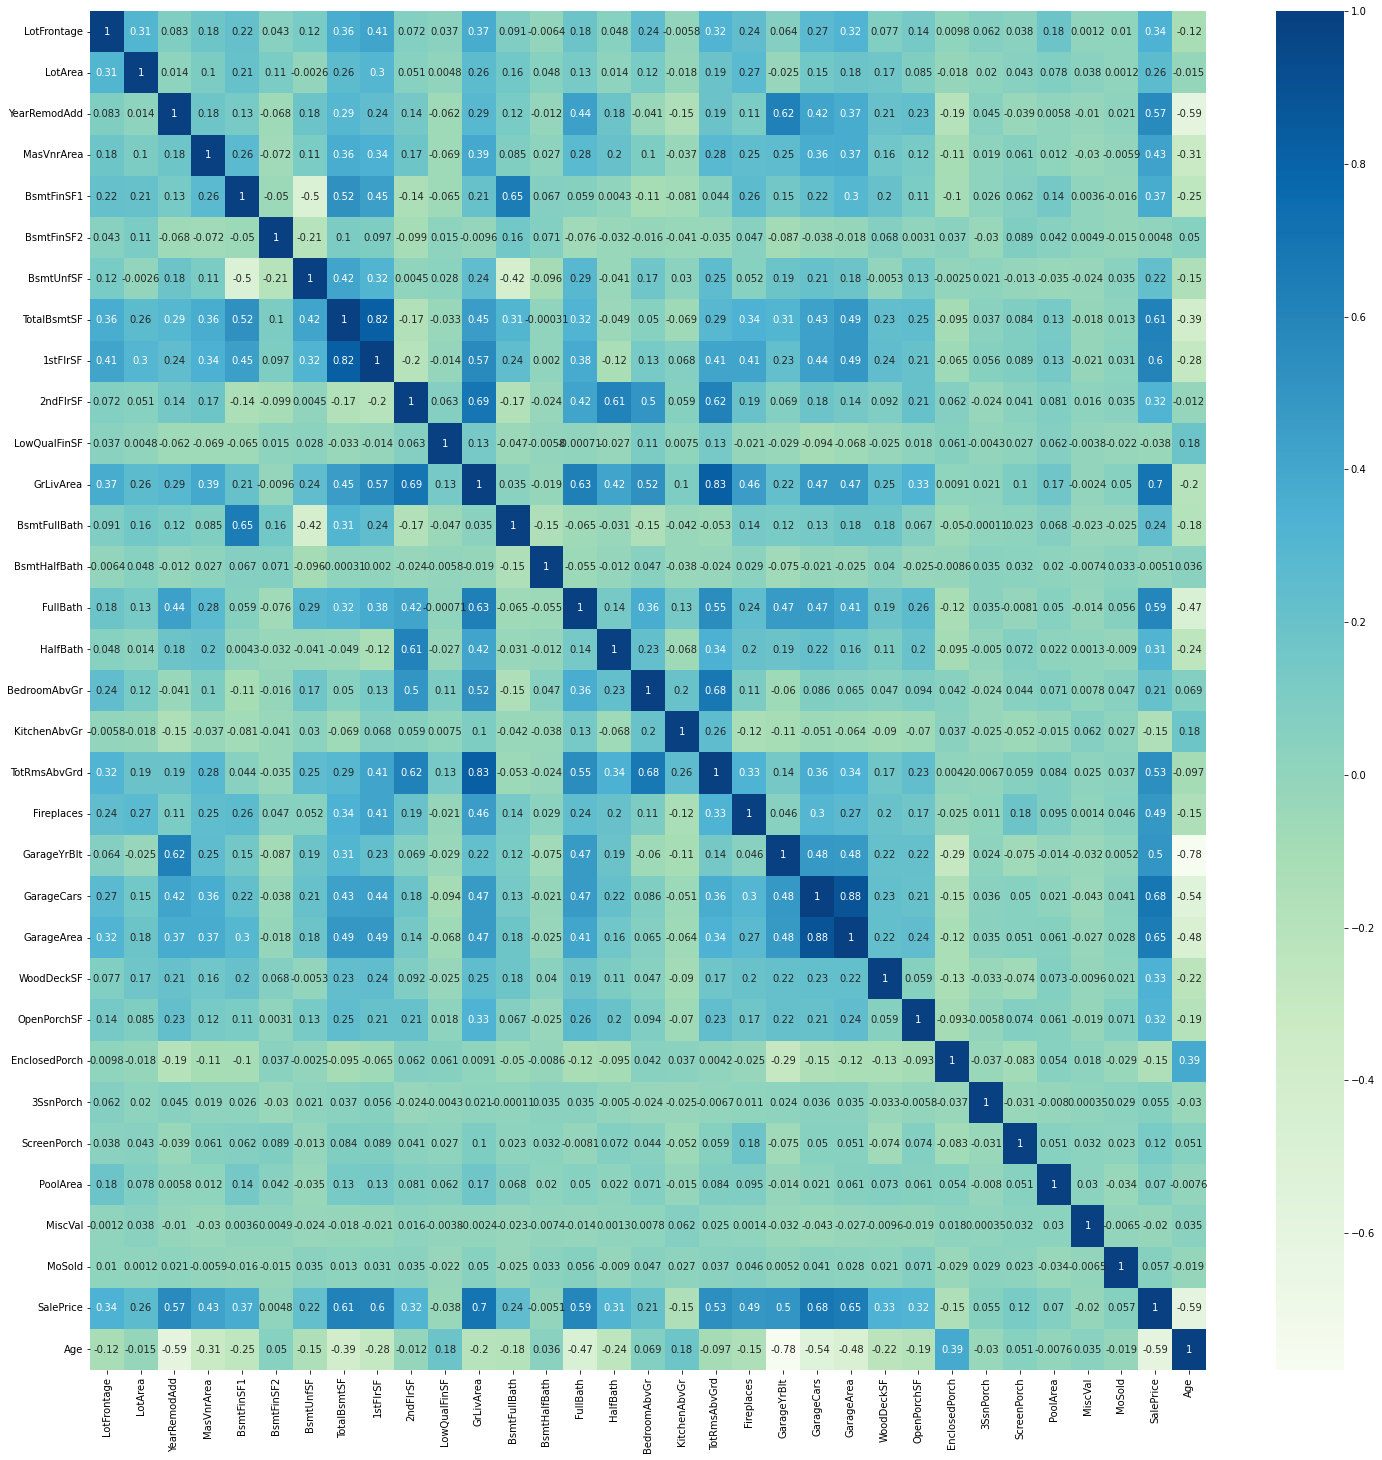

In [36]:
plt.figure(figsize=(25,25))
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap = 'GnBu')

<Axes: >

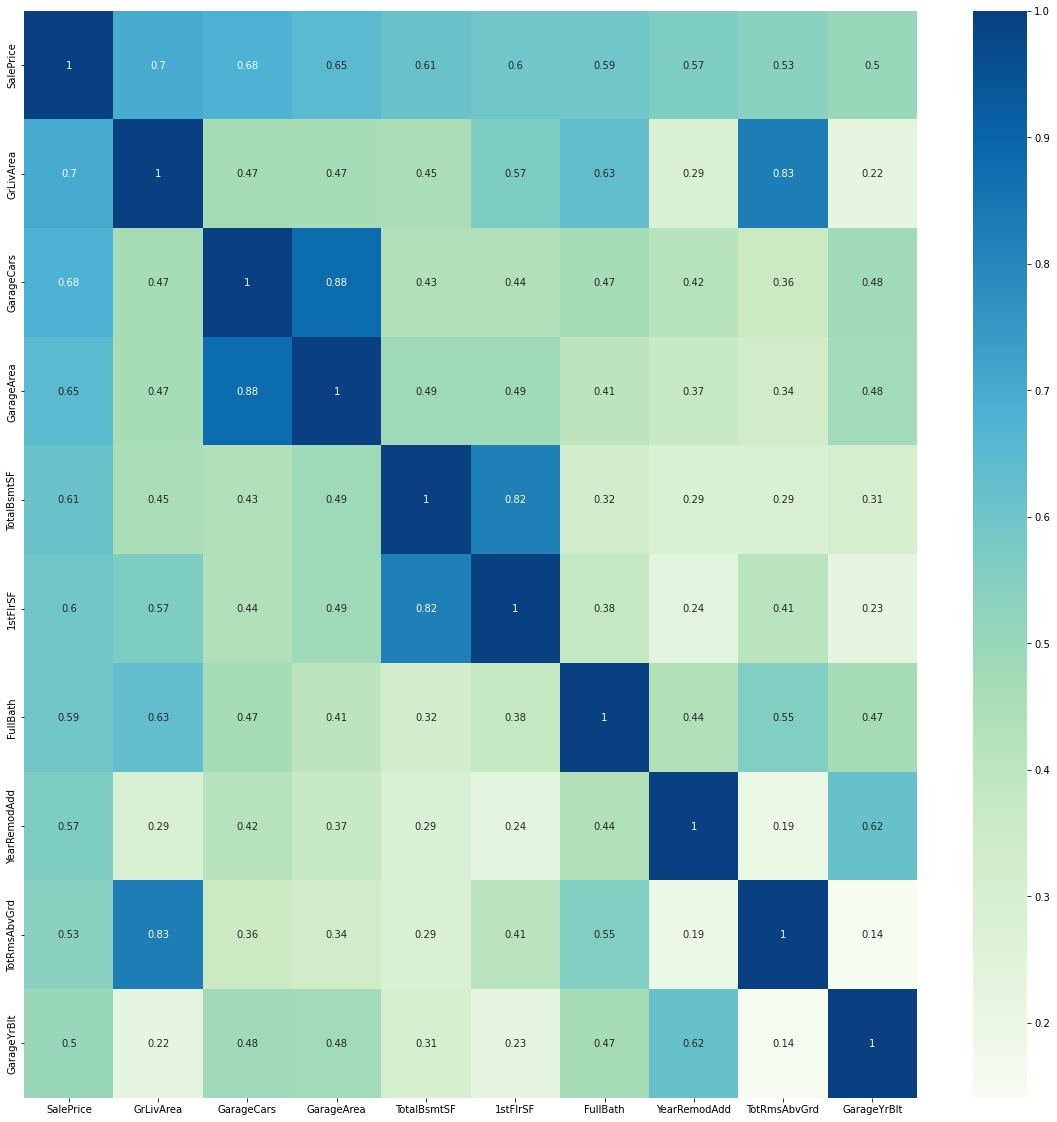

In [37]:
cols = housing.corr(numeric_only=True).nlargest(10,'SalePrice').index
cm=np.corrcoef(housing[cols].values.T)
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, cmap = 'GnBu', yticklabels=cols.values , xticklabels=cols.values)

<Figure size 1440x1440 with 0 Axes>

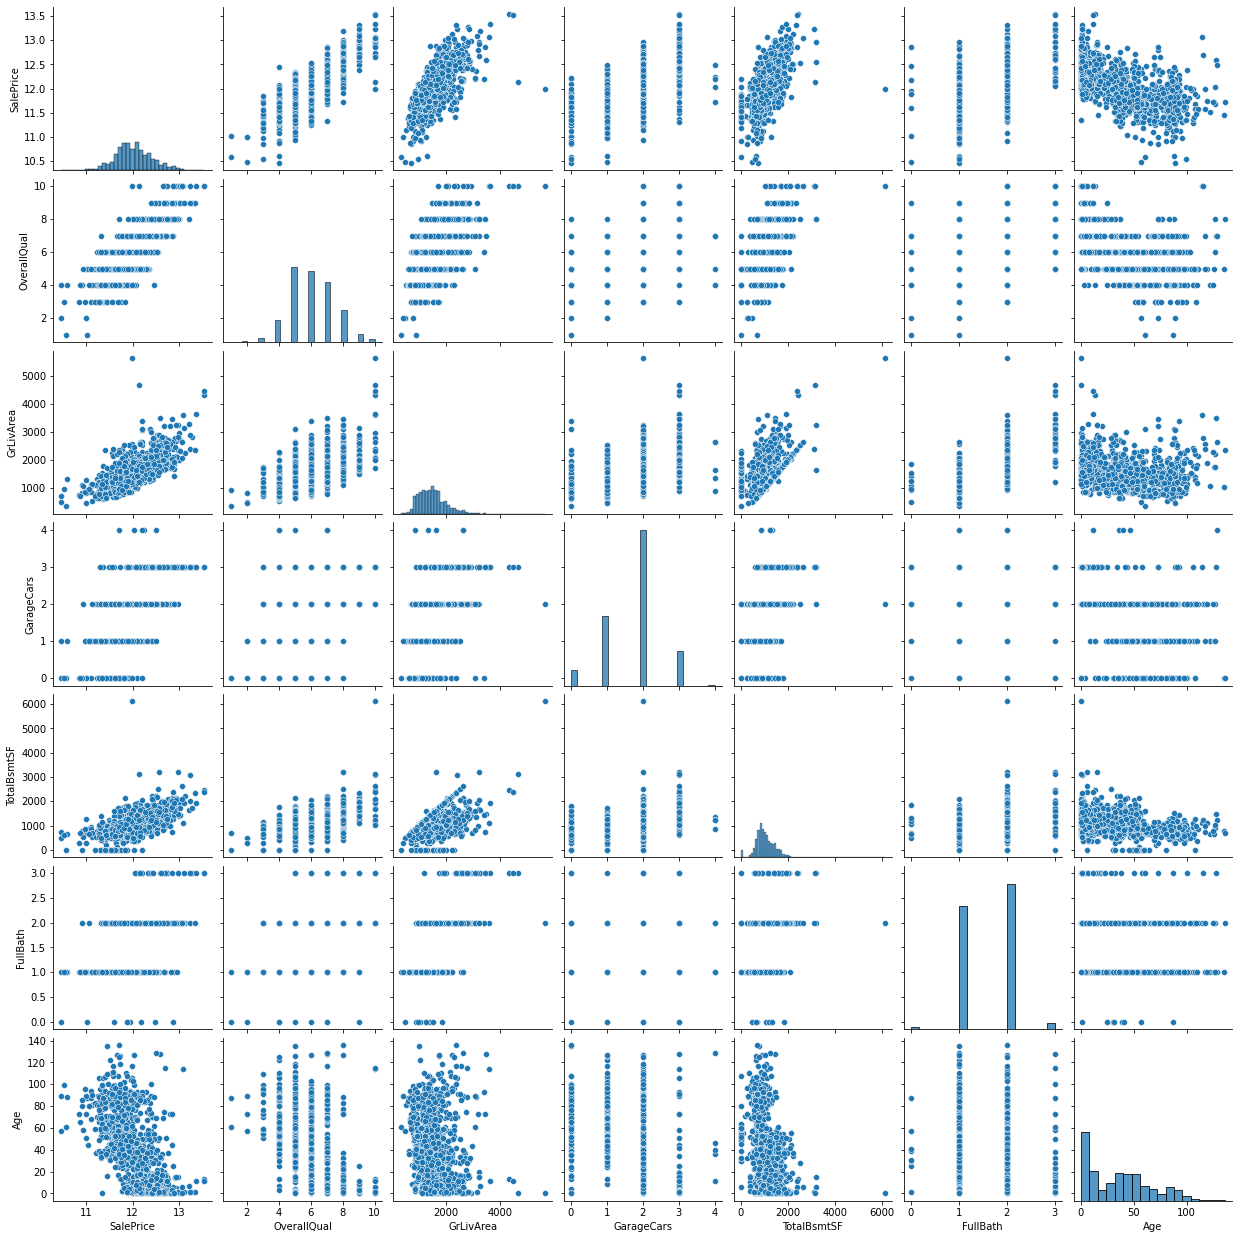

In [38]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'Age']
plt.figure(figsize=(20,20))
sns.pairplot(housing[cols])
plt.show()

## Data Preparation

In [39]:
housing_num = housing.select_dtypes(include=['int64','float64'])
housing_cat = housing.select_dtypes(include='object')
housing_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [40]:
housing_cat_dn = pd.get_dummies(housing_cat, drop_first=True, dtype=int)
housing_cat_dn.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType

In [41]:
house = pd.concat([housing_num, housing_cat_dn], axis=1)

In [42]:
house.shape

(1460, 288)

In [43]:
x = house.drop(['SalePrice'], axis=1).copy()
y = house['SalePrice'].copy()

In [44]:
x.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,Garag

##### Data Split

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
X_train ,X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state=42)

In [47]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

In [48]:
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotCon

In [49]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [50]:
def eval_metrics(y_train, y_train_pred, y_test, y_test_pred):
    
    # r2 values for train and test 
    print('r2 score (train) - ', '%.2f' % r2_score(y_train,y_train_pred))
    print('r2 score (test) - ', '%.2f' % r2_score(y_test,y_test_pred))    
    
    ## RMSE for train and test data
    mse_train = mean_squared_error(y_train,y_train_pred)
    mse_test = mean_squared_error(y_test,y_test_pred)   
    rmse_train = mse_train**0.5
    rmse_test = mse_test**0.5  
    
    print("RMSE(TRAIN) - ", '%.2f' % rmse_train)
    print("RMSE(TEST) - ", '%.2f' % rmse_test)    

## ML MODEL

In [51]:
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': 
          [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 50, 75, 100, 250, 500, 750, 1000]
         }

ridge = Ridge()
ridgeCV = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=1)
ridgeCV.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 25, 50, 75, 100, 250,
                                   500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
ridgeCV.best_params_

{'alpha': 250}

In [54]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.0879035 , 0.08687029, 0.07577825, 0.0755312 , 0.07479348,
        0.07905078, 0.08429389, 0.08706932, 0.08368921, 0.08998322,
        0.07541676, 0.08752074, 0.08594232, 0.08607178, 0.08531208,
        0.0811583 , 0.06979175, 0.07075171, 0.07719626, 0.08130217,
        0.07936773, 0.06606183, 0.08393402, 0.05928211, 0.06819053,
        0.0789144 , 0.06750736, 0.08448939, 0.08441358, 0.08480988,
        0.08471651, 0.08316207]),
 'std_fit_time': array([0.04597761, 0.01236269, 0.00977123, 0.03088432, 0.01295795,
        0.00880811, 0.00137102, 0.0021064 , 0.00235141, 0.01406186,
        0.01399517, 0.00514582, 0.0018703 , 0.00281302, 0.00130704,
        0.01623709, 0.01463442, 0.01444202, 0.01270581, 0.00381954,
        0.01332118, 0.02274605, 0.01595511, 0.02505871, 0.01572118,
        0.01566747, 0.006522  , 0.01161833, 0.00090567, 0.00057201,
        0.00065993, 0.00379906]),
 'mean_score_time': array([0.05911541, 0.08071237, 0.05309186, 0.02615752, 0.043323

In [55]:
y_train_pred = ridgeCV.predict(X_train)
y_test_pred = ridgeCV.predict(X_test)

In [56]:
eval_metrics(y_train, y_train_pred, y_test, y_test_pred)

r2 score (train) -  0.93
r2 score (test) -  0.88
RMSE(TRAIN) -  0.10
RMSE(TEST) -  0.14


In [57]:
ridgeCV_res = pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.087903,0.045978,0.059115,0.024049,0.0001,{'alpha': 0.0001},-0.108135,-0.117046,-0.113900,-0.108611,-0.102680,-0.110075,0.004976,32,-0.056046,-0.055221,-0.052882,-0.056983,-0.058567,-0.055940,0.001891
1,0.086870,0.012363,0.080712,0.017922,0.001,{'alpha': 0.001},-0.108130,-0.117047,-0.113864,-0.108608,-0.102658,-0.110061,0.004978,31,-0.056046,-0.055222,-0.052883,-0.056985,-0.058570,-0.055941,0.001891
2,0.075778,0.009771,0.053092,0.009592,0.01,{'alpha': 0.01},-0.108078,-0.117062,-0.113510,-0.108578,-0.102443,-0.109934,0.005000,30,-0.056047,-0.055226,-0.052899,-0.057003,-0.058603,-0.055955,0.001897
3,0.075531,0.030884,0.026158,0.000202,0.05,{'alpha': 0.05},-0.107853,-0.117113,-0.112156,-0.108445,-0.101646,-0.109443,0.005109,29,-0.056052,-0.055270,-0.052973,-0.057086,-0.058733,-0.056023,0.001915
4,0.074793,0.012958,0.043323,0.011381,0.1,{'alpha': 0.1},-0.107599,-0.117246,-0.110844,-0.108307,-0.100937,-0.108987,0.005270,28,-0.056058,-0.055333,-0.053055,-0.057182,-0.058869,-0.056099,0.001934


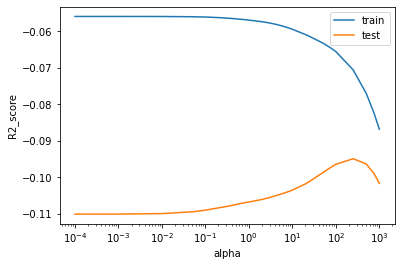

In [58]:
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_train_score'], label='train')
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_test_score'], label='test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'alpha': 250}
{'mean_fit_time': array([0.06341128, 0.10694299, 0.08937616, 0.08766303, 0.08087215,
       0.08404932, 0.08354592, 0.08176651, 0.0669498 , 0.0771409 ,
       0.08318243, 0.08238325, 0.08292017, 0.07448511, 0.07552218,
       0.07084818, 0.07545304, 0.07516799, 0.07604194, 0.07370491,
       0.09406791, 0.07701616, 0.07123981, 0.06858101, 0.07801065,
       0.06911736, 0.06985073, 0.07475553, 0.07713628, 0.07191062,
       0.07209482, 0.07375689]), 'std_fit_time': array([0.0323913 , 0.05701231, 0.03335138, 0.02754676, 0.01078034,
       0.00086963, 0.00091308, 0.00173074, 0.01307185, 0.01816136,
       0.00117132, 0.00105149, 0.005543  , 0.01673155, 0.0113798 ,
       0.01948068, 0.01387246, 0.01211616, 0.01070922, 0.01240012,
       0.05722614, 0.01093784, 0.01907057, 0.01115639, 0.01614332,
       0.01528456, 0.0103198 , 0.01516204, 0.01901171, 0.01468172,
       0.01243274, 0.01211215]), 'mean_score_time': 

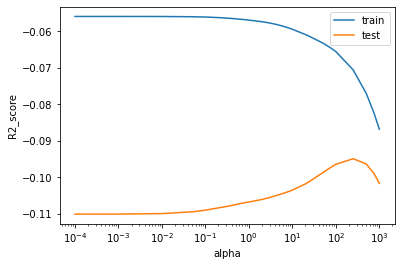

In [59]:
params = {'alpha': 
          [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 50, 75, 100, 250, 500, 750, 1000]
         }

lasso = Lasso()
lassoCV = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=1)
lassoCV.fit(X_train, y_train)
print(lassoCV.best_params_)
print(lassoCV.cv_results_)
y_train_pred = lassoCV.predict(X_train)
y_test_pred = lassoCV.predict(X_test)
eval_metrics(y_train, y_train_pred, y_test, y_test_pred)
lassoCV_res = pd.DataFrame(lassoCV.cv_results_)
lassoCV_res.head()

plt.plot(lassoCV_res['param_alpha'], lassoCV_res['mean_train_score'], label='train')
plt.plot(lassoCV_res['param_alpha'], lassoCV_res['mean_test_score'], label='test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [60]:
best_ridge = ridgeCV.best_estimator_
best_lasso = lassoCV.best_estimator_


beats = pd.DataFrame(index = x.columns)
beats.rows = x.columns
beats['Ridge'] = best_ridge.coef_
beats['Lasso'] = best_lasso.coef_
beats

,Ridge,Lasso
LotFrontage,0.000827,0.000827
LotArea,0.013938,0.013938
YearRemodAdd,0.019722,0.019722
MasVnrArea,0.009757,0.009757
BsmtFinSF1,0.009438,0.009438
BsmtFinSF2,0.005310,0.005310
BsmtUnfSF,0.003365,0.003365
TotalBsmtSF,0.014836,0.014836
1stFlrSF,0.023885,0.023885
2ndFlrSF,0.016167,0.016167


In [61]:
lasso_cols_removed = list(beats[beats['Lasso']==0].index)
print(lasso_cols_removed)

['Condition2_PosA', 'Condition2_RRNn', 'RoofMatl_Membran', 'Exterior1st_ImStucc', 'Electrical_Mix']


In [62]:
lasso_cols_selected = list(beats[beats['Lasso']!=0].index)
print(lasso_cols_selected)
print(len(lasso_cols_selected))

['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Age', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_None', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod

In [63]:
beats["Ridge"].sort_values(ascending=False)[:10]

GrLivArea               0.031856
OverallQual_9           0.026090
1stFlrSF                0.023885
GarageCars              0.023721
OverallQual_8           0.022802
TotRmsAbvGrd            0.022304
Neighborhood_NridgHt    0.021087
YearRemodAdd            0.019722
FullBath                0.019654
GarageArea              0.018956
Name: Ridge, dtype: float64

In [64]:
ridge_coeffs = np.exp(beats['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.032369
OverallQual_9           1.026433
1stFlrSF                1.024172
GarageCars              1.024005
OverallQual_8           1.023064
TotRmsAbvGrd            1.022555
Neighborhood_NridgHt    1.021311
YearRemodAdd            1.019918
FullBath                1.019848
GarageArea              1.019137
Name: Ridge, dtype: float64

In [65]:
beats["Lasso"].sort_values(ascending=False)[:10]
lasso_coeffs = np.exp(beats['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.032369
OverallQual_9           1.026433
1stFlrSF                1.024172
GarageCars              1.024005
OverallQual_8           1.023064
TotRmsAbvGrd            1.022555
Neighborhood_NridgHt    1.021311
YearRemodAdd            1.019918
FullBath                1.019848
GarageArea              1.019137
Name: Lasso, dtype: float64


# CONCLUSION: 

### Below are the top 10 features with corresponding coefficients according to Ridge model:
    
> 1).  GrLivArea               1.032369

> 2).  OverallQual_9           1.026433

> 3).  1stFlrSF                1.024172

> 4).  GarageCars              1.024005

> 5).  OverallQual_8           1.023064

> 6).  TotRmsAbvGrd            1.022555

> 7).  Neighborhood_NridgHt    1.021311

> 8).  YearRemodAdd            1.019918

> 9).  FullBath                1.019848

> 10). GarageArea              1.019137

### Below are the top 10 features with corresponding coefficients according to Lasso model:

> 1). GrLivArea               1.032369

> 2). OverallQual_9           1.026433

> 3). 1stFlrSF                1.024172

> 4). GarageCars              1.024005

> 5). OverallQual_8           1.023064

> 6). TotRmsAbvGrd            1.022555

> 7). Neighborhood_NridgHt    1.021311

> 8). YearRemodAdd            1.019918

> 9). FullBath                1.019848

> 10).GarageArea              1.019137


> So here to highlight that both RIdge and Lasso algorithms will give us appropreate results only. 


### The list of features and their respective importance values indicates which attributes of a house have the most significant impact on predicting its price. Here’s a detailed interpretation:

##### 1) GrLivArea: 
> Gross Living Area is the most influential feature in predicting house prices. This makes sense as larger living spaces typically command higher prices due to the increased usable area. Which means that if GrLivArea increases then price will increase 1.032369 times.

##### 2) OverallQual_9:
> Overall Quality of house with Quality rating of 9, will increase the price of house 1.026433 times.

##### 3) 1stFlrSF:
> First Floor Square Footage is another critical feature. Larger first-floor areas are desirable and add significant value to a house. This means if Larger first floor areas, price increase 1.024172 times.

##### 4) GarageCars:
> The number of Garage Spaces impacts house prices notably. More garage spaces are often associated with larger, more valuable properties. WHich means that if Garage cars space increase then price hike will be 1.024005 times.

##### 5) OverallQual_8: 
> Overall Quality of house with Quality rating of 8, will increase the price of house 1.023065 times.

##### 6) TotRmsAbvGrd: 
> The total number of Rooms Above Ground affects the price. More rooms typically mean a larger and potentially more versatile living space, which buyers value. Means price will hike 1.022555 times

##### 7) Neighborhood_NridgHt: 
> The house being located in the Neighborhood of NridgHt (Northridge Heights) is a significant predictor. This suggests that houses in this neighborhood are generally priced higher, possibly due to better amenities, location, or reputation. Means hike of 1.021311 times.

##### 8) YearRemodAdd :
> The Year the House was Remodeled or Added to impacts its value. More recent renovations usually mean the house is more up-to-date and potentially more appealing to buyers. Means price will hike 1.019918 times.

##### 9) FullBath:
> The number of Full Bathrooms is an important feature. More full bathrooms increase the convenience and utility of the property, thereby increasing its value. Means if number of full bathrooms increases, price will rise with 1.019848 times.

##### 10) GarageArea:
> The Area of the Garage also influences house prices. Larger garages provide more storage and utility space, which can be attractive features for buyers. Means Area increases then price will hike 1.019137 times.

### Overall Insights: 

##### Living Space and Quality: 
> The size of the living area (GrLivArea, 1stFlrSF) and overall quality ratings (OverallQual) are the most critical factors in determining house prices. Larger and higher-quality homes naturally fetch higher prices.

##### Garage and Bathrooms: 
> The presence and size of garages (GarageCars, GarageArea) and the number of full bathrooms significantly contribute to the house price, highlighting the importance of these features in buyer decisions.

##### Neighborhood Influence: 
> Location remains a crucial factor, as indicated by the importance of the Neighborhood feature (NridgHt). This aligns with real estate trends where location often dictates property values.

##### Recent Renovations: 
> The recency of renovations (YearRemodAdd) affects house prices, emphasizing the value of updated and modernized homes.


These insights can help real estate professionals, buyers, and sellers understand which features are most valued in the market, thereby informing decisions related to property improvements, pricing strategies, and purchase considerations.
